<a href="https://colab.research.google.com/github/x1001000/ML-DL-UL-RL/blob/master/neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

- 資料都是數據化的多維陣列  
資料常要視覺化以幫助理解
- 匯入多維陣列運算要用的函式庫 numpy，以下簡稱為 np  
匯入作圖要用的函式庫 matplotlib.pyplot，以下簡稱為 plt

In [0]:
import numpy as np
import matplotlib.pyplot as plt

- 串列(list)與陣列(array)的元素，皆有序可供索引  
串列的元素可以不同類別  
陣列的元素必須相同類別，儲存在記憶體的一段連續位址上
- 複習一下串列

In [2]:
a = [ [3,4,5,6], [7,8,9,0] ]
print(type(a))
print(len(a))

<class 'list'>
2


- 陣列 = np.array(串列)
- 陣列 aka 張量  
矩陣 aka 二維張量  
向量 aka 一維張量
- 查看陣列的形狀(shape)及維度(ndim)

In [3]:
a = np.array( [a,a,a,a,a] )
print(type(a))
print(len(a))
print(a.shape)
print(a.ndim)

<class 'numpy.ndarray'>
5
(5, 2, 4)
3


# Linear Regression

- 線性迴歸就是求最接近全部樣本的一個線性函數
- 用一個極簡的例子來理解訓練神經元(線性迴歸)：  
用五個x(feature)及其y(label)求最佳化的w(weight)和b(bias)，使得線性函數y=wx+b最接近這五個資料點

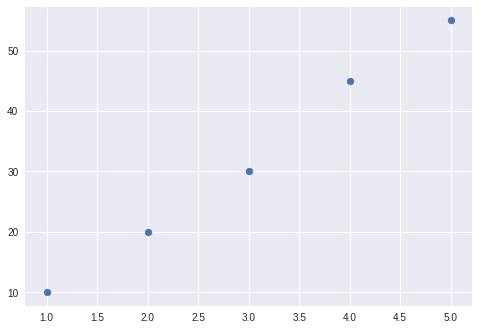

In [4]:
x = np.array( [1,2,3,4,5]      )
y = np.array( [10,20,30,45,55] )
plt.scatter(x,y)

# Model

- 初學者用高階的Keras庫(之後再用TensorFlow)  
初學者用順序式模型(之後再用函數式模型)

In [5]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.


- Dense(全連接)層的三個參數：  
輸出y為一維的向量，故只需units=1個神經元  
輸入x為一維的向量，故這個Dense層的input_dim=1  
激活函數activation=None，讓y直接等於f(x)

In [0]:
from keras.layers import Dense
model.add(Dense(units=1, input_dim=1, activation=None))

- 誤差函數Loss(w,b)，採用MSE(均方誤差法)  
w和b的最佳化，採用SGD(隨機梯度下降法)

In [0]:
model.compile(loss='MSE',
              optimizer='SGD')

- 列出神經網路架構  
這個極簡的例子只有一個神經元，只訓練到w和b兩個參數

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Train

- 訓練8個回合(epochs)
- 看w和b

In [9]:
model.fit(x, y, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 165ms/step - loss: 1198.1240
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 700.8373
Epoch 3/10
5/5 [==============================] - 0s 666us/step - loss: 411.0298
Epoch 4/10
5/5 [==============================] - 0s 570us/step - loss: 242.1309
Epoch 5/10
5/5 [==============================] - 0s 510us/step - loss: 143.6916
Epoch 6/10
5/5 [==============================] - 0s 748us/step - loss: 86.3128
Epoch 7/10
5/5 [==============================] - 0s 723us/step - loss: 52.8621
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 33.3556
Epoch 9/10
5/5 [==============================] - 0s 587us/step - loss: 21.9752
Epoch 10/10
5/5 [==============================] - 0s 687us/step - loss: 15.3304


In [10]:
w, b = model.layers[0].get_weights()
print('w =', w)
print('b =', b)

w = [[9.463205]]
b = [2.326558]


- 再訓練8個回合(epochs)
- 再看w和b

In [11]:
model.fit(x, y, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 11.4453
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 9.1685
Epoch 3/10
5/5 [==============================] - 0s 985us/step - loss: 7.8291
Epoch 4/10
5/5 [==============================] - 0s 893us/step - loss: 7.0360
Epoch 5/10
5/5 [==============================] - 0s 636us/step - loss: 6.5613
Epoch 6/10
5/5 [==============================] - 0s 940us/step - loss: 6.2723
Epoch 7/10
5/5 [==============================] - 0s 823us/step - loss: 6.0916
Epoch 8/10
5/5 [==============================] - 0s 593us/step - loss: 5.9741
Epoch 9/10
5/5 [==============================] - 0s 776us/step - loss: 5.8934
Epoch 10/10
5/5 [==============================] - 0s 918us/step - loss: 5.8344


In [12]:
w, b = model.layers[0].get_weights()
print('w =', w)
print('b =', b)

w = [[10.115741]]
b = [2.3277895]


# Inference

- 用訓練過的模型/網路做預測  
輸入訓練用的feature，輸出結果應該很接近但不會剛好等於label

In [13]:
model.predict(x)

array([[12.44353 ],
       [22.55927 ],
       [32.67501 ],
       [42.790752],
       [52.906494]], dtype=float32)

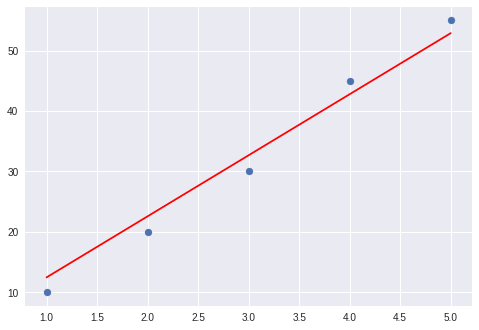

In [14]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')